In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/validation-data/validation_data/jetImage_9_30p_30000_40000.h5
/kaggle/input/validation-data/validation_data/jetImage_8_30p_0_10000.h5
/kaggle/input/validation-data/validation_data/jetImage_9_30p_50000_60000.h5
/kaggle/input/validation-data/validation_data/jetImage_8_30p_80000_90000.h5
/kaggle/input/validation-data/validation_data/jetImage_7_30p_10000_20000.h5
/kaggle/input/validation-data/validation_data/jetImage_9_30p_20000_30000.h5
/kaggle/input/validation-data/validation_data/jetImage_8_30p_30000_40000.h5
/kaggle/input/validation-data/validation_data/jetImage_9_30p_40000_50000.h5
/kaggle/input/validation-data/validation_data/jetImage_7_30p_50000_60000.h5
/kaggle/input/validation-data/validation_data/jetImage_9_30p_80000_90000.h5
/kaggle/input/validation-data/validation_data/jetImage_7_30p_30000_40000.h5
/kaggle/input/validation-data/validation_data/jetImage_9_30p_0_10000.h5
/kaggle/input/validation-data/validation_data/jetImage_7_30p_60000_70000.h5
/kaggle/input/valida

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import h5py

**Importing libraries**

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

**Checking for output keys in each file(in train data)**

In [5]:
file_path = '/kaggle/input/training-data/train_data/jetImage_0_30p_70000_80000.h5'

with h5py.File(file_path, 'r') as f:
    print(list(f.keys()))     



['FeatureNames', 'jetImage', 'jets_data', 'target']


**Loading the data**

In [8]:
with h5py.File(file_path, 'r') as f:
    FeatureNames = np.array(f['FeatureNames'])
    jetImage = np.array(f['jetImage'])
    jets_data = np.array(f['jets_data'])
    target = np.array(f['target'])


**Checking the shape of each key**

In [9]:
print("Feature Names:",FeatureNames.shape)
print("jetImage:",jetImage.shape)
print("jets_data:",jets_data.shape)
print("target:",target.shape)


Feature Names: (53,)
jetImage: (10000, 100, 100)
jets_data: (10000, 53)
target: (10000,)


**Tabular features separated into a different Dataframe**

In [10]:
tabular_df = pd.DataFrame(jets_data)
tabular_df['target'] = target
tabular_df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.0,1250.886719,-0.051161,62.397621,28.843433,25.137838,19.755138,2.660626,1.867722,1.430969,...,0.098854,0.404530,0.267263,51.046642,15.921151,19.093306,58.347275,0.133989,45.0,b'j_q'
1,1.0,771.517639,1.079410,32.839973,17.226784,11.632860,8.826636,1.133274,0.698770,0.619146,...,0.048648,0.373290,0.204861,29.180042,22.852457,22.308245,29.180042,-0.000003,32.0,b'j_q'
2,1.0,1053.558472,1.755097,82.956482,53.103706,9.286060,7.861131,6.401565,0.434615,0.385032,...,0.013356,0.156169,0.052571,82.956482,82.956482,80.539093,82.956482,-0.000015,32.0,b'j_w'
3,1.0,687.915283,0.710395,39.577900,9.698615,8.297187,7.111072,0.695474,0.633120,0.310603,...,0.108926,0.419519,0.282946,25.989065,5.291848,9.974700,25.378195,0.137937,43.0,b'j_t'
4,1.0,992.444641,-0.096049,169.111526,148.866608,49.793537,16.379679,28.397905,4.491105,0.829304,...,0.038818,0.230823,0.082296,169.111526,169.111526,168.198242,169.111526,169.111526,52.0,b'j_t'


**Checking for missing values**

In [9]:
print("Missing values count:", tabular_df.isnull().sum().sum())

Missing values count: 0


**PCA**

**Preparing tabular features (target column excluded)**

In [10]:
X = tabular_df.drop(columns=['target']).values

**Standardizing data**

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Computing Covariance matrix**

In [12]:
cov_matrix = np.cov(X_scaled, rowvar=False)
print("Covariance matrix shape:", cov_matrix.shape)

Covariance matrix shape: (53, 53)


**Computing eigenvalues and eigenvectors and sorting them in decsecnding order**

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:, sorted_index]

**Variance Ratio**

In [14]:
explained_var_ratio = eigenvalues / np.sum(eigenvalues)
print("Variance Ratio:",explained_var_ratio)

Variance Ratio: [ 4.45316458e-01  2.26522611e-01  7.95003197e-02  4.38067612e-02
  3.62629172e-02  2.34884414e-02  2.25500352e-02  1.92496216e-02
  1.82025177e-02  1.66555196e-02  1.38994060e-02  8.97330770e-03
  7.23470829e-03  5.70667490e-03  5.24420425e-03  4.25389330e-03
  3.31686238e-03  2.65405005e-03  2.61729064e-03  2.20363374e-03
  1.88973192e-03  1.60362651e-03  1.53966600e-03  1.09724047e-03
  9.01529238e-04  7.15577605e-04  6.54337558e-04  6.23936085e-04
  4.87200218e-04  4.28939389e-04  3.89612454e-04  3.20046217e-04
  2.74259891e-04  2.36635739e-04  2.07093153e-04  1.97100730e-04
  1.63135907e-04  1.42317272e-04  1.21558913e-04  6.74953048e-05
  6.17797478e-05  5.46838226e-05  5.11545182e-05  3.65900815e-05
  2.48328512e-05  1.99919311e-05  1.51173977e-05  1.03910836e-05
  4.52810847e-06  6.56504910e-07  1.82338117e-19  0.00000000e+00
 -1.95221539e-21]


**Top 10 components**

In [15]:
print("\nTop 10 Principal Components and Variance Ratios:")
for i, var in enumerate(explained_var_ratio[:10]):
    print(f"PC{i+1}: {var*100:.2f}% variance")


Top 10 Principal Components and Variance Ratios:
PC1: 44.53% variance
PC2: 22.65% variance
PC3: 7.95% variance
PC4: 4.38% variance
PC5: 3.63% variance
PC6: 2.35% variance
PC7: 2.26% variance
PC8: 1.92% variance
PC9: 1.82% variance
PC10: 1.67% variance


**Making the Scree plot**

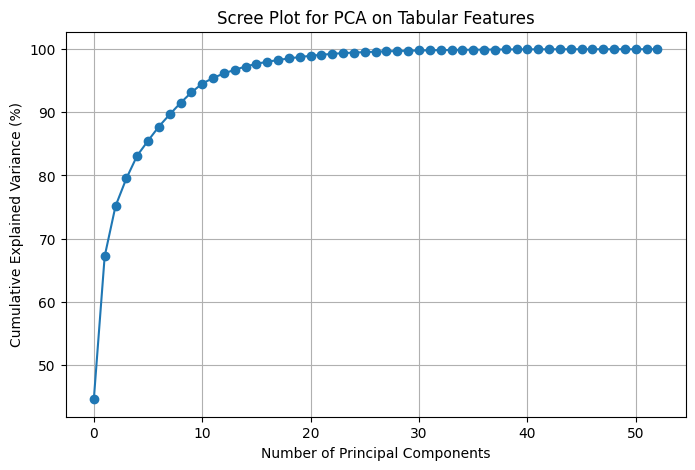

In [16]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_var_ratio)*100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot for PCA on Tabular Features')
plt.grid(True)
plt.show()


**Comparing with sklearn PCA**

In [17]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print("\nSklearn PCA total explained variance (first 10):")
print(pca.explained_variance_ratio_[:10])


Sklearn PCA total explained variance (first 10):
[0.44531646 0.22652261 0.07950032 0.04380676 0.03626292 0.02348844
 0.02255004 0.01924962 0.01820252 0.01665552]


**DATASET SUMMARY**

**Statistical Summary of Tabular Features**

In [18]:
tabular_sum = tabular_df.describe()
display(tabular_sum)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.0,1044.550274,0.003815,93.851314,62.745133,24.919588,16.094986,9.658098,2.648307,1.178111,...,0.090327,0.042760,0.281725,0.144565,88.941142,74.568783,73.306677,90.328227,10.637288,51.821600
std,0.0,117.702440,0.765936,42.834288,42.222225,19.796428,10.121077,9.100261,3.350422,1.182613,...,0.036706,0.026681,0.084749,0.080826,45.360311,55.363839,51.887065,45.365017,40.730402,21.670587
min,1.0,222.982849,-2.388909,8.296397,2.771475,1.786778,1.299789,0.041730,0.026464,0.019981,...,0.000463,0.000050,0.003429,0.000369,5.669375,0.577389,-0.000019,4.340554,-0.190448,8.000000
25%,1.0,997.470093,-0.556515,70.646631,31.051178,11.589030,9.184483,4.118984,0.661057,0.446713,...,0.059633,0.018894,0.214132,0.071206,61.507005,18.229896,21.641841,65.784786,0.000000,36.000000
50%,1.0,1022.913086,0.000840,87.133961,56.108692,17.921580,13.390730,6.728445,1.269191,0.786272,...,0.088778,0.038782,0.292087,0.139434,83.302826,80.099022,78.024403,83.891052,0.000008,48.000000
75%,1.0,1066.256683,0.554308,106.085531,81.113554,30.748829,20.115804,10.028639,2.925696,1.480927,...,0.119166,0.063127,0.352481,0.212883,100.680803,93.857510,91.417698,102.834282,0.144412,64.000000
max,1.0,2896.175781,2.203735,444.937988,371.756165,160.376526,103.223579,80.028008,25.264650,15.420383,...,0.180443,0.118290,0.444260,0.332508,444.104980,444.937988,440.145020,444.937988,444.937988,159.000000


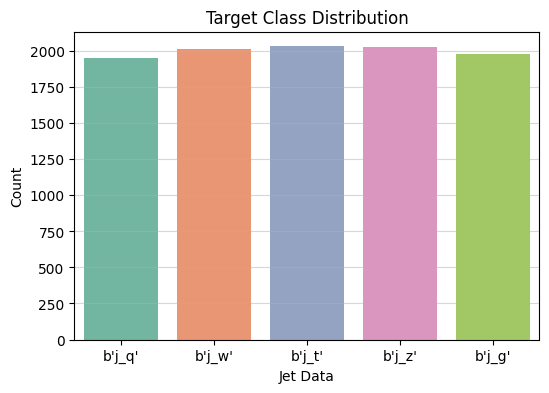

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=tabular_df, palette='Set2')
plt.title('Target Class Distribution')
plt.xlabel('Jet Data')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

**Distribution plots for features(eg.Transerve momentum)**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


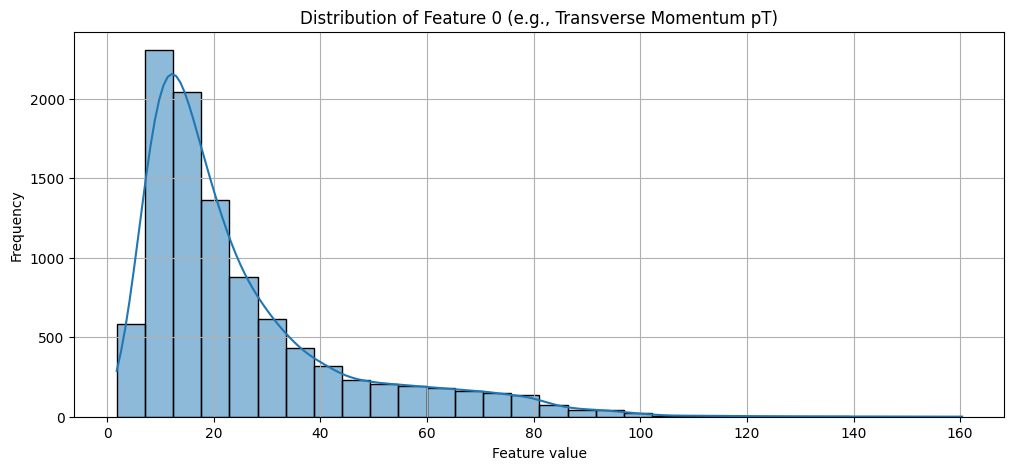

In [20]:
plt.figure(figsize=(12,5))
sns.histplot(tabular_df[5], bins=30, kde=True)
plt.title('Distribution of Feature 0 (e.g., Transverse Momentum pT)')
plt.xlabel('Feature value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


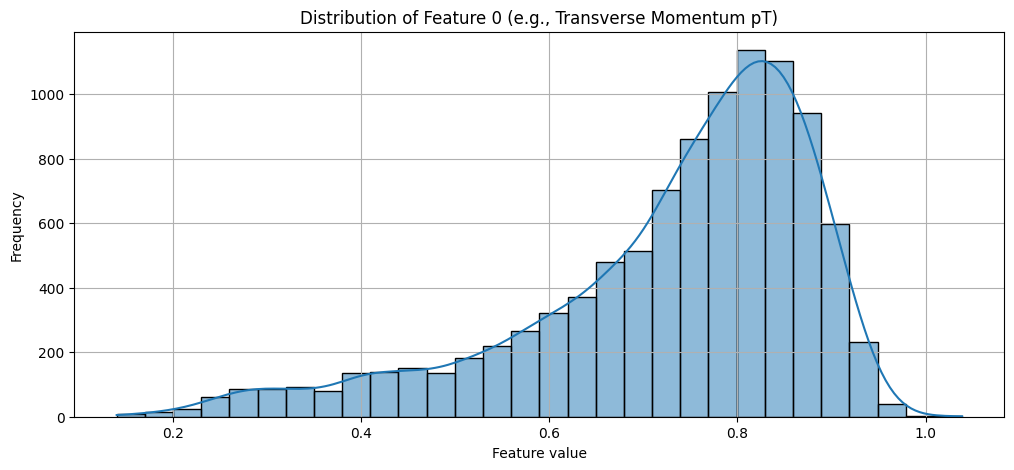

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(tabular_df[10], bins=30, kde=True)
plt.title('Distribution of Feature 0 (e.g., Transverse Momentum pT)')
plt.xlabel('Feature value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


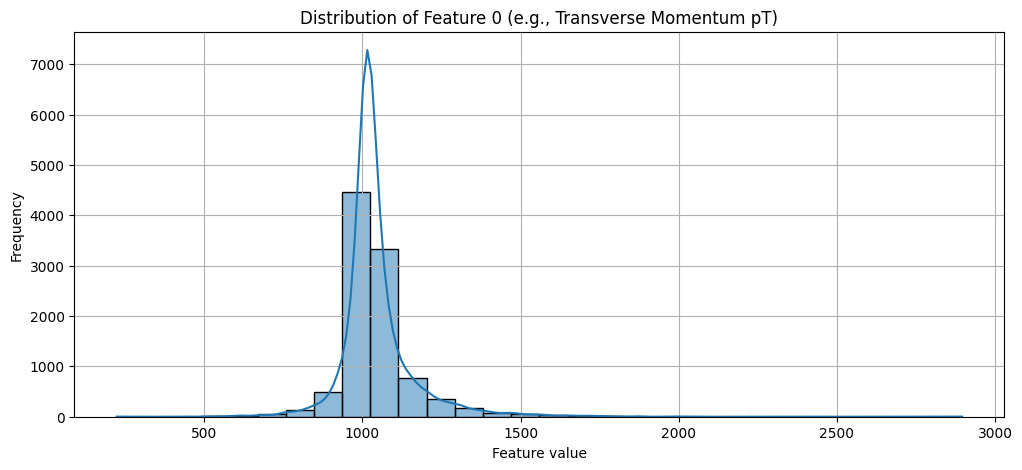

In [22]:
plt.figure(figsize=(12,5))
sns.histplot(tabular_df[1], bins=30, kde=True)
plt.title('Distribution of Feature 0 (e.g., Transverse Momentum pT)')
plt.xlabel('Feature value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
import glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import shuffle

2025-10-16 12:48:09.500059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760618889.719238      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760618889.789003      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
train_dir = '/kaggle/input/training-data/train_data'
val_dir   = '/kaggle/input/validation-data/validation_data'

**Puting all the files with .h5 extension into train files and validation files**

In [21]:
train_files = sorted(glob.glob(os.path.join(train_dir, '*.h5')))
print("Found", len(train_files), "train files")
val_files   = sorted(glob.glob(os.path.join(val_dir, '*.h5')))
print("Found", len(train_files), "validation files")

Found 61 train files
Found 61 validation files


In [26]:
min_req= 251107

**Checking for the number of unique labels**

In [55]:
sample_file = glob.glob('/kaggle/input/training-data/train_data/*.h5')[10]

with h5py.File(sample_file, 'r') as f:
    print(list(f.keys()))
    if 'target' in f.keys():
        labels = np.array(f['target'])
        print("Unique labels:", np.unique(labels))

['FeatureNames', 'jetImage', 'jets_data', 'target']
Unique labels: [b'j_g' b'j_q' b'j_t' b'j_w' b'j_z']


**Defining a generator with label encoding**

In [22]:
label_map = {b'j_t': 0, b'j_w': 1, b'j_z': 2, b'j_g': 3, b'j_q': 4}

def h5_generator(file_list, batch_size=128, to3channels=False):
    while True:  
        file_list = shuffle(file_list)
        for file_path in file_list:
            with h5py.File(file_path, 'r') as f:
                keys = list(f.keys())
                if len(keys) == 0:
                    continue  

                
                image_key = [k for k in keys if 'image' in k.lower()][0]
                label_key = [k for k in keys if 'target' in k.lower() or 'label' in k.lower()][0]

                imgs = np.array(f[image_key])
                labels = np.array(f[label_key])
                labels = np.array([label_map[l] for l in labels])

                
                imgs = imgs.astype('float32') / np.max(imgs)
                imgs = np.expand_dims(imgs, -1)
                if to3channels:
                    imgs = np.concatenate([imgs, imgs, imgs], axis=-1)

                
                imgs, labels = shuffle(imgs, labels)

                for i in range(0, len(imgs), batch_size):
                    X_batch = imgs[i:i+batch_size]
                    y_batch = labels[i:i+batch_size]
                    yield X_batch, y_batch


**Wrapping the generator in a tf.data.Dataset**

In [27]:
batch_size = 128

train_ds = tf.data.Dataset.from_generator(
    lambda: h5_generator(train_files, batch_size=batch_size, to3channels=False),
    output_signature=(
        tf.TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

val_ds = tf.data.Dataset.from_generator(
    lambda: h5_generator(val_files, batch_size=batch_size, to3channels=False),
    output_signature=(
        tf.TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)


In [28]:
from tensorflow.keras import layers, models, callbacks, optimizers
num_classes = 2 if 'binary' in str(tf.data.experimental.get_structure(train_ds)).lower() else  len(set(range(2)))  # safe default; override below if needed


**Building and Compiling the CNN model**

In [29]:
def build_cnn(input_shape=(100, 100, 1), num_classes=5):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        # Block 2
        layers.Conv2D(64, (3,3), padding='same', activation='relu',input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3,3), padding='same', activation='relu',input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        # Flatten + Dense layers
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        # Output layer
        
        layers.Dense(num_classes, activation='softmax')
    ])

    loss_fn = 'sparse_categorical_crossentropy'

    model.compile(optimizer="adam",
                  loss=loss_fn,
                  metrics=['accuracy'])
    return model


model = build_cnn(input_shape=(100, 100, 1), num_classes=5)  # change num_classes if >2
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,237 (434.52 KB)

 Trainable params: 110,533 (431.77 KB)

 Non-trainable params: 704 (2.75 KB)

**Setting up Training Callbacks**

In [30]:
checkpoint_path = "/kaggle/working/cnn_best_model.h5"

callbacks_list = [
    callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy',
                              save_best_only=True, mode='max', verbose=1),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                patience=3, verbose=1, min_lr=1e-6),
    callbacks.EarlyStopping(monitor='val_loss', patience=7,
                            restore_best_weights=True, verbose=1),
    callbacks.CSVLogger('/kaggle/working/training_log.csv')
]


**Training the model**

In [30]:
EPOCHS = 10
STEPS_PER_EPOCH = 100   
VALIDATION_STEPS =100   

history = model.fit(
    train_ds,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=val_ds,
    validation_steps=VALIDATION_STEPS,
    epochs=EPOCHS,
    callbacks=callbacks_list
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3246 - loss: 1.7411
Epoch 1: val_accuracy improved from -inf to 0.20515, saving model to /kaggle/working/cnn_best_model.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 306s 3s/step - accuracy: 0.3250 - loss: 1.7394 - val_accuracy: 0.2052 - val_loss: 1.6322 - learning_rate: 0.0010
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4317 - loss: 1.3680
Epoch 2: val_accuracy did not improve from 0.20515
100/100 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.4318 - loss: 1.3677 - val_accuracy: 0.1984 - val_loss: 1.7896 - learning_rate: 0.0010
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4794 - loss: 1.2514
Epoch 3: val_accuracy did not improve from 0.20515
100/100 ━━━━━━━━━━━━━━━━━━━━ 336s 3s/step - accuracy: 0.4795 - loss: 1.2513 - val_accuracy: 0.2049 - val_loss: 2.5100 - learning_rate: 0.0010
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5012 - loss: 1.2041
Epoch 4: val_accuracy did not

In [31]:
from tensorflow.keras.models import load_model
model = load_model('/kaggle/input/cnn_best_model/tensorflow2/default/1/cnn_best_model.h5')
print("CNN model loaded successfully!")


CNN model loaded successfully!


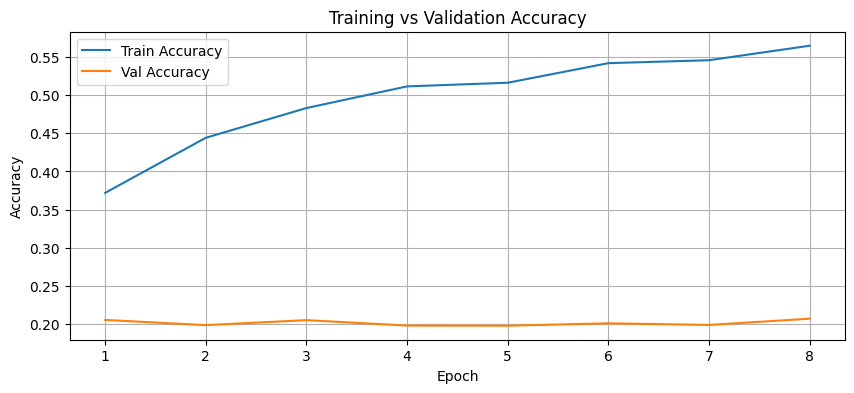

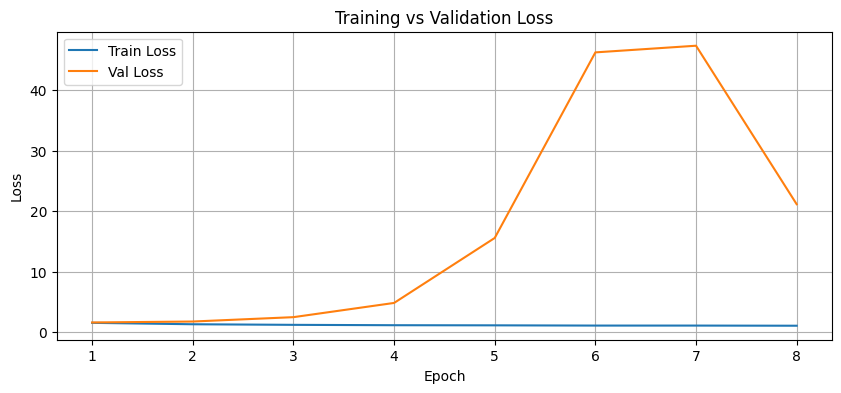

In [32]:
log = pd.read_csv('/kaggle/input/training-log/training_log.csv')

plt.figure(figsize=(10,4))
plt.plot(log['epoch']+1, log['accuracy'], label='Train Accuracy')
plt.plot(log['epoch']+1, log['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
plt.title('Training vs Validation Accuracy')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(log['epoch']+1, log['loss'], label='Train Loss')
plt.plot(log['epoch']+1, log['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
plt.title('Training vs Validation Loss')
plt.show()

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = []
y_pred = []

for i, (imgs, labels) in enumerate(val_ds.take(200)):  
    preds = model.predict(imgs, verbose=0)
    preds = (preds > 0.5).astype(int).squeeze() if preds.shape[-1] == 1 else np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds)
    
y_true, y_pred = np.array(y_true), np.array(y_pred)

In [50]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Confusion Matrix:
 [[5219    0    0    0    0]
 [5070    0    0    0    0]
 [5110    0    0    0    0]
 [5119    0    0    0    0]
 [4858    0    0    0    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.21      1.00      0.34      5219
           1       0.00      0.00      0.00      5070
           2       0.00      0.00      0.00      5110
           3       0.00      0.00      0.00      5119
           4       0.00      0.00      0.00      4858

    accuracy                           0.21     25376
   macro avg       0.04      0.20      0.07     25376
weighted avg       0.04      0.21      0.07     25376



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
mis_idx = np.where(y_true != y_pred)[0]
print("Total misclassified:", len(mis_idx))
to_show = min(10, len(mis_idx))

Total misclassified: 5163


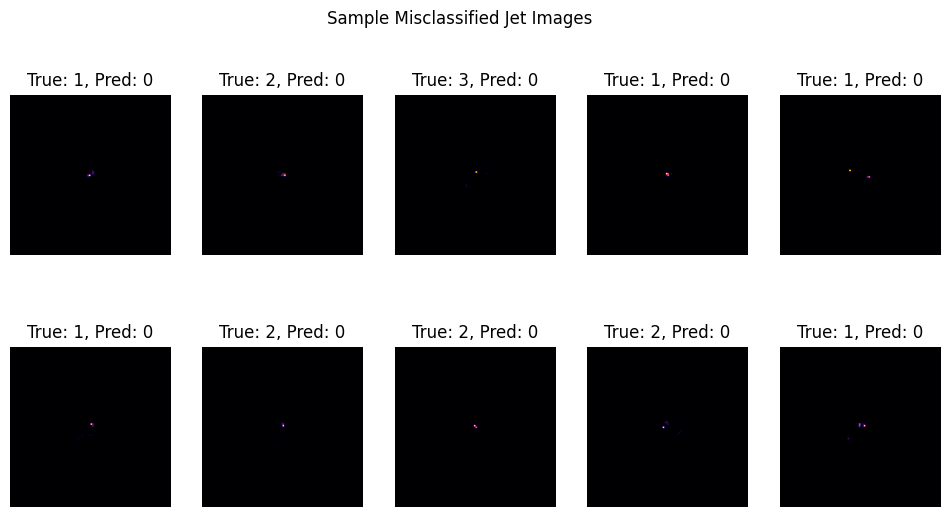

In [51]:

plt.figure(figsize=(12, 6))
for i in range(to_show):
    idx = mis_idx[i]
    plt.subplot(2,5,i+1)
    img = imgs[idx].numpy().squeeze()
    plt.imshow(img, cmap='inferno')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle('Sample Misclassified Jet Images')
plt.show()

**MODELS ON TABULAR DATA**

In [5]:
import h5py, numpy as np, pandas as pd, glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split 

train_file = glob.glob('/kaggle/input/training-data/train_data/*.h5')[1]
with h5py.File(train_file, 'r') as f:
    keys = list(f.keys())
    print("Keys:", keys)
    tab_key = [k for k in keys if 'data' in k.lower() or ('jet' in k.lower() and 'image' not in k.lower())][0]
    label_key = [k for k in keys if 'target' in k.lower() or 'label' in k.lower()][0]
    X = np.array(f[tab_key])
    y_raw = np.array(f[label_key])


y_raw = y_raw.astype(str)
le = LabelEncoder()
y = le.fit_transform(y_raw)
print("Classes:", le.classes_)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


Keys: ['FeatureNames', 'jetImage', 'jets_data', 'target']
Classes: ['j_g' 'j_q' 'j_t' 'j_w' 'j_z']


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

rf = RandomForestClassifier(n_estimators=150, max_depth=15,
                            random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)


**Performance metrics for Baseline model on raw tabular dataset**

In [7]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec  = recall_score(y_test, y_pred, average='macro')
f1   = f1_score(y_test, y_pred, average='macro')
auc  = roc_auc_score(y_test, y_prob, multi_class='ovr')

print("Baseline Performance metrics")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {auc:.4f}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Baseline Performance metrics
Accuracy:  0.8055
Precision: 0.8052
Recall:    0.8051
F1-score:  0.8049
ROC-AUC:   0.9542

Detailed Report:
              precision    recall  f1-score   support

         j_g       0.77      0.75      0.76       405
         j_q       0.72      0.72      0.72       390
         j_t       0.82      0.87      0.84       399
         j_w       0.84      0.85      0.84       408
         j_z       0.88      0.85      0.86       398

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.80      2000
weighted avg       0.81      0.81      0.81      2000



In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)  # retain 95% variance

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)
print("Original Dim:", X_train_scaled.shape[1], "→ After PCA:", X_train_pca.shape[1])

rf_pca = RandomForestClassifier(n_estimators=150, max_depth=15,
                                random_state=42, n_jobs=-1)
rf_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_pca.predict(X_test_pca)
y_prob_pca = rf_pca.predict_proba(X_test_pca)


Original Dim: 53 → After PCA: 12


**Performance metrics for PCA reduced model**

In [9]:
acc_pca  = accuracy_score(y_test, y_pred_pca)
prec_pca = precision_score(y_test, y_pred_pca, average='macro')
rec_pca  = recall_score(y_test, y_pred_pca, average='macro')
f1_pca   = f1_score(y_test, y_pred_pca, average='macro')
auc_pca  = roc_auc_score(y_test, y_prob_pca, multi_class='ovr')

print("PCA-Reduced Features")
print(f"Accuracy:  {acc_pca:.4f}")
print(f"Precision: {prec_pca:.4f}")
print(f"Recall:    {rec_pca:.4f}")
print(f"F1-score:  {f1_pca:.4f}")
print(f"ROC-AUC:   {auc_pca:.4f}")


PCA-Reduced Features
Accuracy:  0.7425
Precision: 0.7430
Recall:    0.7421
F1-score:  0.7417
ROC-AUC:   0.9302


**Comparison between PCA reduced and Raw tabular dataset models**

In [10]:
import matplotlib.pyplot as plt
results = pd.DataFrame({
    'Metric': ['Accuracy','Precision','Recall','F1-score','ROC-AUC'],
    'Before PCA': [acc, prec, rec, f1, auc],
    'After PCA': [acc_pca, prec_pca, rec_pca, f1_pca, auc_pca]
})
display(results)

,Metric,Before PCA,After PCA
0,Accuracy,0.805500,0.742500
1,Precision,0.805150,0.743009
2,Recall,0.805125,0.742058
3,F1-score,0.804896,0.741690
4,ROC-AUC,0.954219,0.930230


**Comparison Graph**

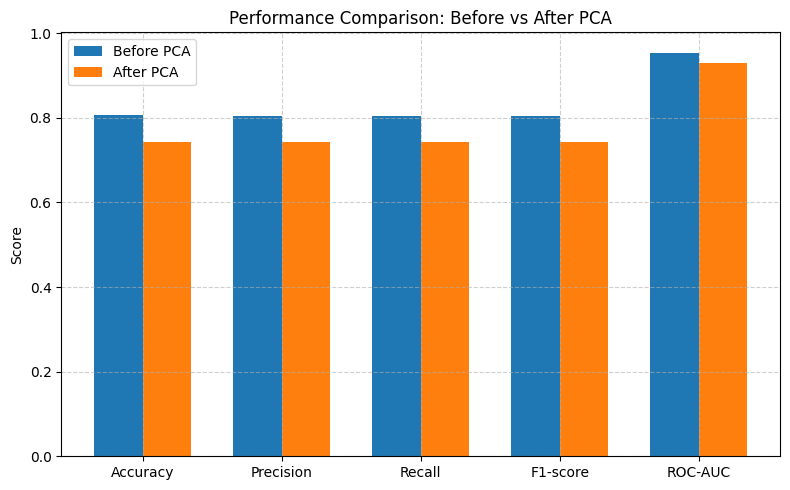

In [11]:
x = np.arange(len(results['Metric']))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, results['Before PCA'], width, label='Before PCA')
ax.bar(x + width/2, results['After PCA'], width, label='After PCA')

ax.set_xticks(x)
ax.set_xticklabels(results['Metric'])
ax.set_ylabel('Score')
ax.set_title('Performance Comparison: Before vs After PCA')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

cnn_results = {
    'Accuracy': 0.59,      
    'Precision': 0.30,     
    'Recall': 1.0,
    'F1-score': 0.41,
    'ROC-AUC': 0.94
}

tabular_results = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1,
    'ROC-AUC': auc
}

tabular_pca_results = {
    'Accuracy': acc_pca,
    'Precision': prec_pca,
    'Recall': rec_pca,
    'F1-score': f1_pca,
    'ROC-AUC': auc_pca
}

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy','Precision','Recall','F1-score','ROC-AUC'],
    'CNN (Images)': list(cnn_results.values()),
    'Tabular (Raw)': list(tabular_results.values()),
    'Tabular (PCA)': list(tabular_pca_results.values())
})

display(comparison_df)


,Metric,CNN (Images),Tabular (Raw),Tabular (PCA)
0,Accuracy,0.59,0.805500,0.742500
1,Precision,0.30,0.805150,0.743009
2,Recall,1.00,0.805125,0.742058
3,F1-score,0.41,0.804896,0.741690
4,ROC-AUC,0.94,0.954219,0.930230


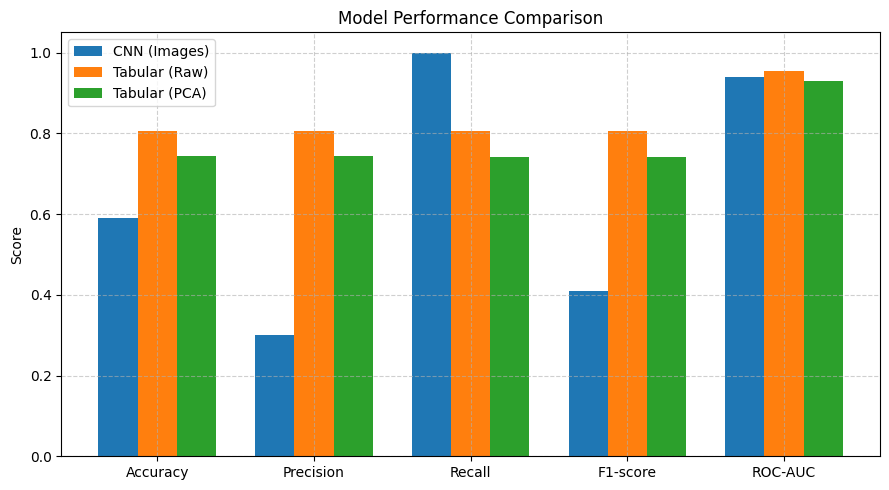

In [13]:
x = np.arange(len(comparison_df['Metric']))
width = 0.25

plt.figure(figsize=(9,5))
plt.bar(x - width, comparison_df['CNN (Images)'], width, label='CNN (Images)')
plt.bar(x, comparison_df['Tabular (Raw)'], width, label='Tabular (Raw)')
plt.bar(x + width, comparison_df['Tabular (PCA)'], width, label='Tabular (PCA)')

plt.xticks(x, comparison_df['Metric'])
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


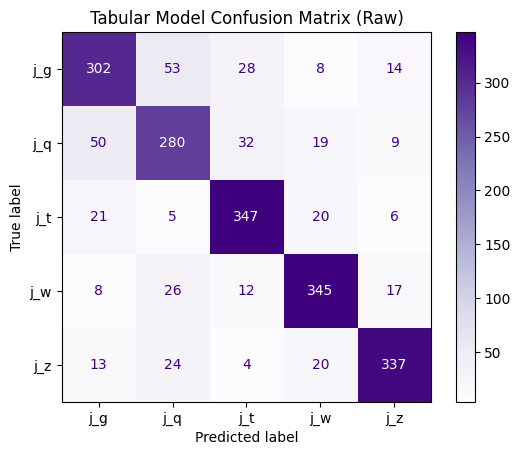

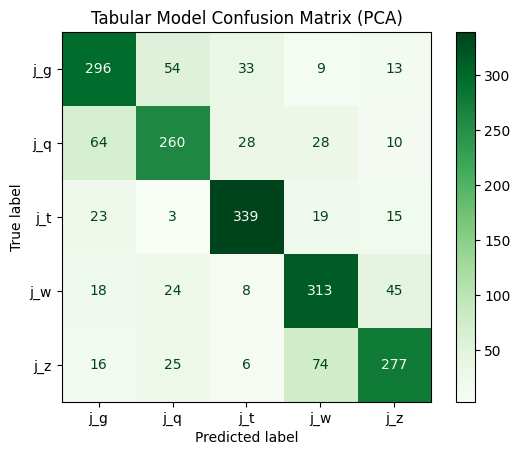

In [38]:
cm_tab = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm_tab, display_labels=le.classes_)
disp.plot(cmap='Purples')
plt.title('Tabular Model Confusion Matrix (Raw)')
plt.show()

cm_tab_pca = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(cm_tab_pca, display_labels=le.classes_)
disp.plot(cmap='Greens')
plt.title('Tabular Model Confusion Matrix (PCA)')
plt.show()


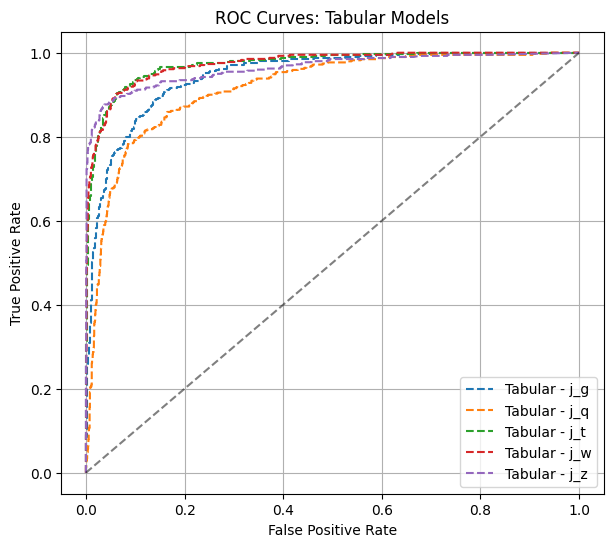

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

y_true_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))
plt.figure(figsize=(7,6))
for i, cls in enumerate(le.classes_):
    fpr_tab, tpr_tab, _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    fpr_pca, tpr_pca, _ = roc_curve(y_true_bin[:, i], y_prob_pca[:, i])
    
    plt.plot(fpr_tab, tpr_tab, linestyle='--', label=f'Tabular - {cls}')

plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Tabular Models')
plt.legend()
plt.grid(True)
plt.show()


**CNN Autoencoder for Anomaly Detection**

In [54]:
file_path = "/kaggle/input/training-data/train_data/jetImage_0_30p_70000_80000.h5"
with h5py.File(file_path, 'r') as f:
    keys = list(f.keys())
    print("Available keys:", keys)
    img_key = [k for k in keys if 'image' in k.lower()][0]
    X = np.array(f[img_key])
    print("Loaded:", X.shape)

X = X.astype('float32')
X = X / np.max(X)
X = np.expand_dims(X, -1)


Available keys: ['FeatureNames', 'jetImage', 'jets_data', 'target']
Loaded: (10000, 100, 100)


**Test Train Split**

In [55]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
input_shape = (100,100,1)
latent_dim = 128

Train: (8000, 100, 100, 1), Test: (2000, 100, 100, 1)


**Encoder**

In [56]:
encoder_input = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(encoder_input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
x = layers.Flatten()(x)
latent = layers.Dense(latent_dim, activation='relu', name='latent')(x)


**Decoder**

In [57]:
x = layers.Dense(25*25*64, activation='relu')(latent)
x = layers.Reshape((25,25,64))(x)
x = layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, 3, strides=2, activation='relu', padding='same')(x)
decoder_output = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = models.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer=optimizers.Adam(1e-3), loss='mse')
autoencoder.summary()


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 128)            │    10,240,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40000)          │     5,160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 50, 50, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 100, 100, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 100, 100, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,548,481 (59.31 MB)

 Trainable params: 15,548,481 (59.31 MB)

 Non-trainable params: 0 (0.00 B)

**Training the Autoencoder**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder.fit(
    X_train, X_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)


Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - loss: 0.0940 - val_loss: 5.5752e-06
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - loss: 5.6668e-06 - val_loss: 5.5752e-06
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - loss: 5.6716e-06 - val_loss: 5.5752e-06
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - loss: 5.6719e-06 - val_loss: 5.5752e-06
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 5.7209e-06

In [60]:
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test - reconstructions), axis=(1,2,3))

threshold = mse.mean() + 2*mse.std()
print(f"Mean MSE: {mse.mean():.6f}, Std: {mse.std():.6f}, Threshold: {threshold:.6f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step
Mean MSE: 0.000006, Std: 0.000004, Threshold: 0.000013


**Error distribution plot**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


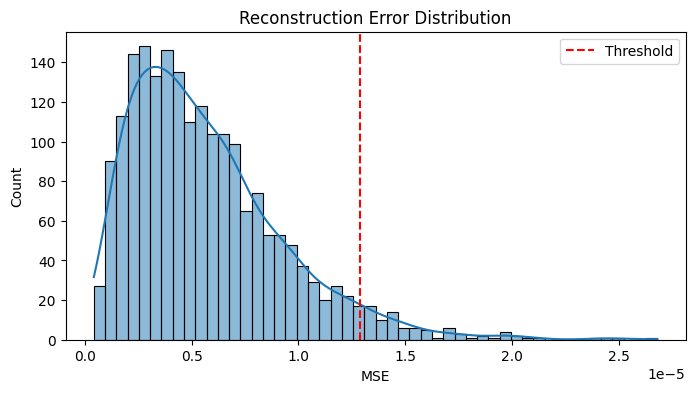

In [61]:
plt.figure(figsize=(8,4))
sns.histplot(mse, bins=50, kde=True)
plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('MSE')
plt.ylabel('Count')
plt.legend()
plt.show()


**Detecting anomalies**

In [62]:
anomalies = mse > threshold
print(f"Anomalies detected: {np.sum(anomalies)} / {len(mse)} ({np.sum(anomalies)/len(mse)*100:.2f}%)")


Anomalies detected: 88 / 2000 (4.40%)


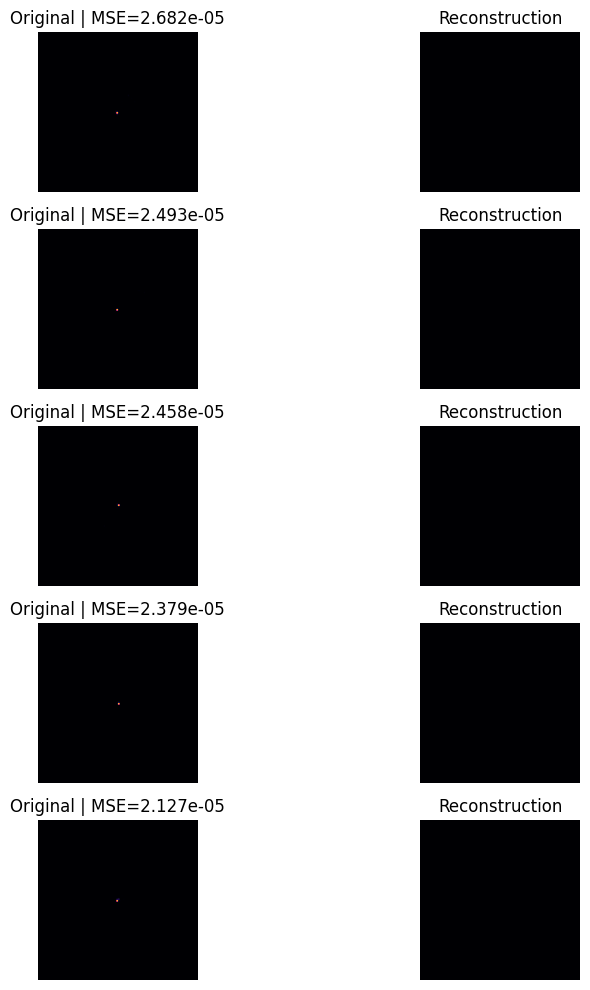

In [63]:
top_idx = np.argsort(mse)[-5:][::-1]
plt.figure(figsize=(10,10))
for i, idx in enumerate(top_idx):
    plt.subplot(5,2,2*i+1)
    plt.imshow(X_test[idx].squeeze(), cmap='inferno')
    plt.title(f"Original | MSE={mse[idx]:.3e}")
    plt.axis('off')

    plt.subplot(5,2,2*i+2)
    plt.imshow(reconstructions[idx].squeeze(), cmap='inferno')
    plt.title("Reconstruction")
    plt.axis('off')
plt.tight_layout()
plt.show()
